# BUSINESS UNDERSTANDING

**Background** : The Dataset provides the annual water usage in Baltimore from 1885 to 1963, or 79 years of data.
The values are in the units of liters per capita per day, and there are 79 observations.

**Objective** : Create a python script for the Use Case below, please upload the script after you finish.
The Problem is to predict annual water usage.

**Instructions** :
1. Load the dataset as a Pandas Series and split into two, one for model development (dataset.csv) and the other for validation (validation.csv).
2. Create summary of the dataset, with python function.
3. Create A line plot of a time series dataset, it will provide a lot of insight into the problem.
4. Group the annual data by decade and get an idea of the spread of observations for each decade and how this may be changing.
5. Create models using ARIMA
   - Split the dataset into train and test sets directly
   - The first 50% of the dataset will be held back to train the model.
   - The remaining 50% of the dataset will be iterated and test the model.
   - The ARIMA(p,d,q) model requires three parameters and is traditionally configured manually.
   - Use an ARIMA(0,1,0) on the raw data may be a good starting point.
   - When model trained, a one-step prediction made ang the prediction stored for later evaluation.
   - The actual observation from the test dataset woll be added to the training dataset for the next iteration.
   - The predictions made during the enumeration of the test dataset will be evaluated and an RMSE score reported.
6. Calculate the RMSE using the helper function from the scikit-learn library, from dataset only
   - Those RMSE will show you on average, how much the error/the model was wrong/gap between predection and expected value per capita per day for each prediction made.

# DATA UNDERSTANDING

### IMPORT LIBRARY

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import datetime as dt
# import seaborn as sns
rcParams['figure.figsize'] = 10,6

import warnings
warnings.filterwarnings('ignore')

### LOAD DATASET

In [77]:
df = pd.read_csv('water.csv', error_bad_lines=False)

b'Skipping line 82: expected 2 fields, saw 3\n'


In [78]:
df.head()

,Year,"Baltmore city annual water use, liters per capita per day, 1885-1968"
0,1885,356
1,1886,386
2,1887,397
3,1888,397
4,1889,413


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
Year                                                                    79 non-null int64
Baltmore city annual water use, liters per capita per day, 1885-1968    79 non-null int64
dtypes: int64(2)
memory usage: 1.3 KB


From the above, we can know that the dataset has 79 rows and 2 columns.

### SPLIT DATA INTO FOR MODEL DEVELOPMENT AND VALIDATION

I will split the data for model development : validation as 8:2.

In [81]:
import math

split = math.floor(len(df)*0.8)

In [82]:
# dataset for modeling development
# validation for validating model
dataset, validation = df[0:split], df[split:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', index=False)
validation.to_csv('validation.csv', index=False)

Dataset 63, Validation 16


In the next section, I will use *dataset* for model developing.

### EXPLORATORY DATA ANALYSIS

In [83]:
# original file
df.head()

,Year,"Baltmore city annual water use, liters per capita per day, 1885-1968"
0,1885,356
1,1886,386
2,1887,397
3,1888,397
4,1889,413


In [84]:
# dataset file
dataset.head()

,Year,"Baltmore city annual water use, liters per capita per day, 1885-1968"
0,1885,356
1,1886,386
2,1887,397
3,1888,397
4,1889,413


##### The dimension of dataset (row,column)

In [85]:
# original file
df.shape

(79, 2)

In [86]:
# dataset file
dataset.shape

(63, 2)

##### The summary of dataset

In [87]:
# original file
df.describe()

,Year,"Baltmore city annual water use, liters per capita per day, 1885-1968"
count,79.000000,79.000000
mean,1924.000000,512.025316
std,22.949219,75.685072
min,1885.000000,344.000000
25%,1904.500000,462.000000
50%,1924.000000,503.000000
75%,1943.500000,581.000000
max,1963.000000,662.000000


In [88]:
# dataset file
dataset.describe()

,Year,"Baltmore city annual water use, liters per capita per day, 1885-1968"
count,63.000000,63.000000
mean,1916.000000,493.587302
std,18.330303,73.272059
min,1885.000000,344.000000
25%,1900.500000,456.000000
50%,1916.000000,488.000000
75%,1931.500000,518.500000
max,1947.000000,662.000000


##### The information of dataset

In [89]:
# original file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
Year                                                                    79 non-null int64
Baltmore city annual water use, liters per capita per day, 1885-1968    79 non-null int64
dtypes: int64(2)
memory usage: 1.3 KB


Dataset has 79 rows and 2 columns with integer data type for all variables.

In [90]:
# dataset file
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
Year                                                                    63 non-null int64
Baltmore city annual water use, liters per capita per day, 1885-1968    63 non-null int64
dtypes: int64(2)
memory usage: 1.1 KB


In [22]:
# !pip install pandas-profiling

In [23]:
# import pandas_profiling
# pandas_profiling.ProfileReport(df)

# DATA PREPARATION
In this section, I will prepare the data by changing year to index and handling the missing values.

### MISSING VALUES HANDLING

In [91]:
# count_missing = data.isnull().sum().sort_values(ascending = False)
percentage_missing=round(df.isnull().sum()/len(df)*100,2).sort_values(ascending = False)
print(percentage_missing)

Baltmore city annual water use, liters per capita per day, 1885-1968    0.0
Year                                                                    0.0
dtype: float64


The column has no missing values.

### SET YEAR TO INDEX

In [101]:
# set year to index (time series needs index to be analyzed)
datas=dataset.set_index(['Year'])
datas.head()

,"Baltmore city annual water use, liters per capita per day, 1885-1968"
Year,
1885,356
1886,386
1887,397
1888,397
1889,413


### STEP ARIMA
In this section, I will do ARIMA step.

### PLOT TO SEE THE STATIONARY

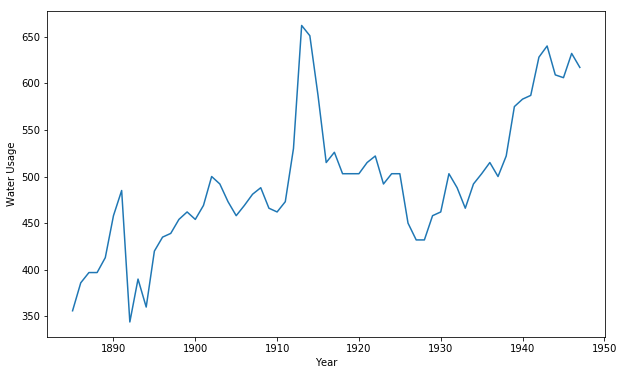

In [103]:
## line plot
plt.xlabel("Year")
plt.ylabel("Water Usage")
plt.plot(datas)

From the plot above, we can know that :
- There is increasing trend in water usage over time.
- There exists fluctuations, but it doesn't appear any outliers.
- There is a downward trend for the last few years of the series.

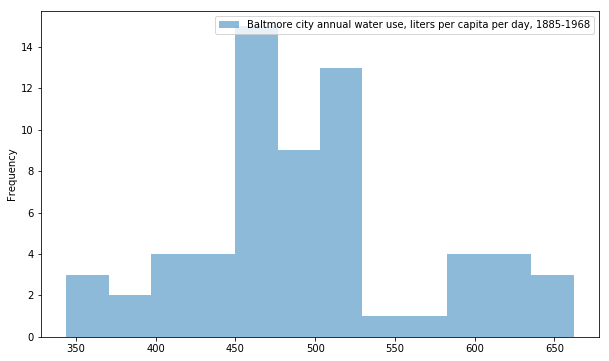

In [104]:
# histogram graph
datas.plot.hist(bins=12, alpha=0.5)

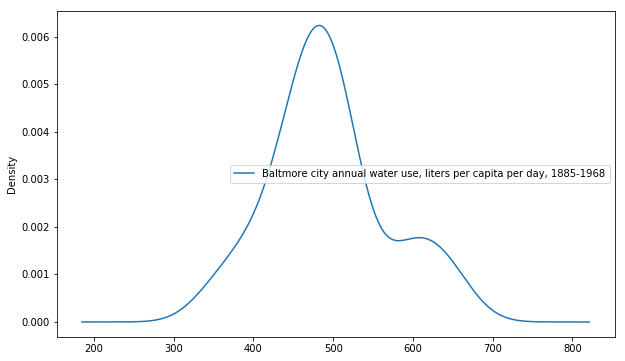

In [105]:
# subplot graph
datas.plot(kind='kde')

From the plot above, we can know that :
- The distribution is not Gaussian, but it is pretty close.

### GROUP DATA BY DECADE

In [121]:
dataset.head()

,Year,"Baltmore city annual water use, liters per capita per day, 1885-1968"
0,1885,356
1,1886,386
2,1887,397
3,1888,397
4,1889,413


In [134]:
# dataset['Year'].min()
dataset['Year'].max()

1947

In [144]:
labels=["{0} - {1}".format(i, i+9) for i in range(1885, 1960, 10)]
dataset['Decade']=pd.cut(df.Year, range(1885, 1968, 10), right=False, labels=labels)

In [147]:
dataset.head()

,Year,"Baltmore city annual water use, liters per capita per day, 1885-1968",Decade
0,1885,356,1885 - 1894
1,1886,386,1885 - 1894
2,1887,397,1885 - 1894
3,1888,397,1885 - 1894
4,1889,413,1885 - 1894
